#K-Means algorithm using Python from scratch.

K Means algorithm is an unsupervised learning algorithm, ie. it needs no training data, it performs the computation on the actual dataset. This should be apparent from the fact that in K Means, we are just trying to group similar data points into clusters, there is no prediction involved.

**k-Means Clustering works:**

1)The K Means algorithm is iterative based, it repeatedly calculates the cluster centroids, refining the values until they do not change much.

The k-means algorithm takes a dataset of ‘n’ points as input, together with an integer parameter ‘k’ specifying how many clusters to create(supplied by the programmer). The output is a set of ‘k’ cluster centroids and a labeling of the dataset that maps each of the data points to a unique cluster.

K Means Math

The math:

![alt text](http://madhugnadig.com/articles/images/kmeansmath.png)

2) k centroids in the dataset. Then it calculates the distance of each point to each centroid. Each centroid represents a cluster and the points closest to the centroid are assigned to the cluster.

3) The centroid values are recalculated, usually taking the arithmetic mean of all points in the cluster.

4) After the new values of centroid are found, the algorithm performs the same set of steps over and over again until the differences between old centroids and the new centroids are negligible.

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline



**1. Read Training Data**

Using pandas to read the file

In [ ]:
df = pd.read_csv("sample_data/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


**Apply Scatter plot to visualize after reading data to check each row **

Text(0, 0.5, 'Income($)')

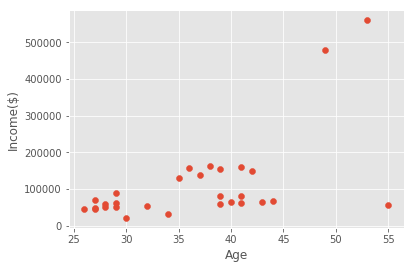

In [ ]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')


#Encode Categorical Values
Not all data can be presented as numbers in our data set. Furthermore, KMeans does not work with textual data therefore the data has to be encoded to numerical values. To elaborate, area and gender features are represented as text fields. We can use label encoders to convert text to numbers:

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,2


In [ ]:
km.cluster_centers_

array([[3.44000000e+01, 5.80250000e+04],
       [5.10000000e+01, 5.20000000e+05],
       [3.82857143e+01, 1.50000000e+05]])

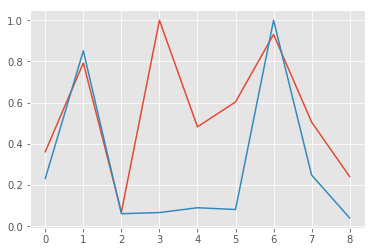

In [ ]:
plt.plot(km.cluster_centers_)

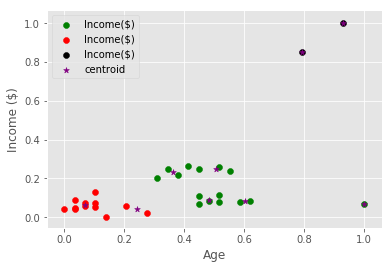

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

**Preprocessing using min max scaler**

In [ ]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [ ]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.034483,0.090909,0
1,Michael,0.103448,0.128015,0
2,Mohan,0.103448,0.074212,0
3,Ismail,0.068966,0.072356,0
4,Kory,0.551724,0.239332,2


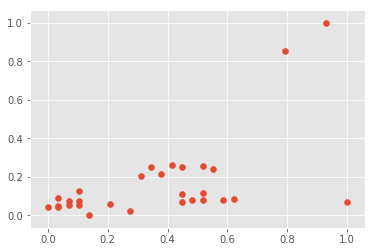

In [ ]:
plt.scatter(df.Age,df['Income($)'])

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 2, 2], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.034483,0.090909,1
1,Michael,0.103448,0.128015,1
2,Mohan,0.103448,0.074212,1
3,Ismail,0.068966,0.072356,1
4,Kory,0.551724,0.239332,0


In [ ]:
km.cluster_centers_


array([[0.50574713, 0.15708101],
       [0.09770115, 0.05774583],
       [0.86206897, 0.9257885 ]])

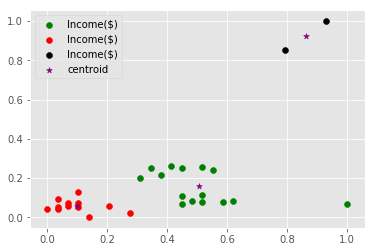

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

#Elbow Plot
The technique to determine K, the number of clusters, is called the elbow method.``

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

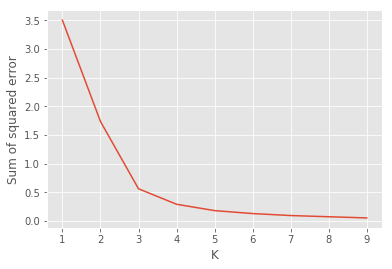

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)